In [1]:
import numpy as np
import epilib as ep
import matplotlib.pyplot as plt
import json
import seaborn as sns

from importlib import reload  

ep = reload(ep)

In [2]:
class Sim:
    
    def __init__(self, path):
        self.hic = ep.get_contactmap(path+"/contacts.txt")
        self.d = ep.get_diagonal(self.hic)
        

In [3]:
!ls

config.json    pc1.txt	    smatrix_off      smatrix_on.log  Untitled.ipynb
epilib.py      pc2.txt	    smatrix_off.log  smatrix.txt
input1024.xyz  __pycache__  smatrix_on	     TICG-engine


In [4]:
off = Sim("smatrix_off")
on = Sim("smatrix_on")


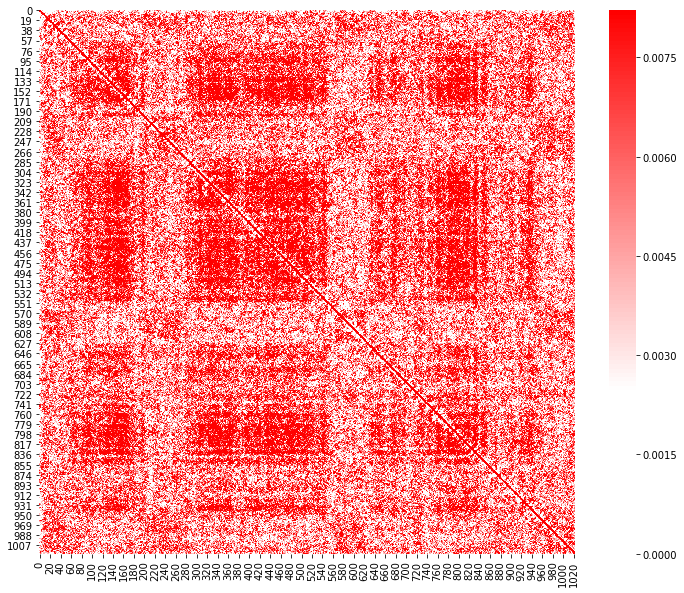

In [7]:
ep.plot_contactmap(off.hic, 0.01)

In [ ]:
ep.plot_contactmap(on.hic, 0.01)

In [12]:
on.hic

array([[1.   , 0.354, 0.058, ..., 0.002, 0.006, 0.004],
       [0.354, 1.   , 0.34 , ..., 0.006, 0.006, 0.004],
       [0.058, 0.34 , 1.   , ..., 0.004, 0.006, 0.002],
       ...,
       [0.002, 0.006, 0.004, ..., 1.   , 0.37 , 0.058],
       [0.006, 0.006, 0.006, ..., 0.37 , 1.   , 0.346],
       [0.004, 0.004, 0.002, ..., 0.058, 0.346, 1.   ]])

In [13]:
nodup.hic

array([[1.   , 0.354, 0.058, ..., 0.002, 0.006, 0.004],
       [0.354, 1.   , 0.34 , ..., 0.006, 0.006, 0.004],
       [0.058, 0.34 , 1.   , ..., 0.004, 0.006, 0.002],
       ...,
       [0.002, 0.006, 0.004, ..., 1.   , 0.37 , 0.058],
       [0.006, 0.006, 0.006, ..., 0.37 , 1.   , 0.346],
       [0.004, 0.004, 0.002, ..., 0.058, 0.346, 1.   ]])

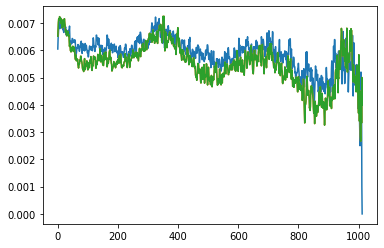

In [10]:
plt.plot(off.d[10:])
plt.plot(on.d[10:])
plt.plot(nodup.d[10:])

In [7]:
def get_smatrix():
    with open("config.json") as f:
        config = json.load(f)

        nspecies = config['nspecies']

        letters = 'ABCDE'

        chi = np.zeros((nspecies, nspecies))
        for i in range(nspecies):
            for j in range(nspecies):
                if j >= i:
                    chi[i,j] = config["chi" + letters[i] + letters[j]]
                    chi[j,i] = config["chi" + letters[i] + letters[j]]

        seqs = []
        for file in config["chipseq_files"]:
            seqs.append( np.loadtxt(file) )
        seqs = np.array(seqs)
    

    smatrix = seqs.T @ chi @ seqs
    
    return smatrix

In [8]:
smatrix = get_smatrix()

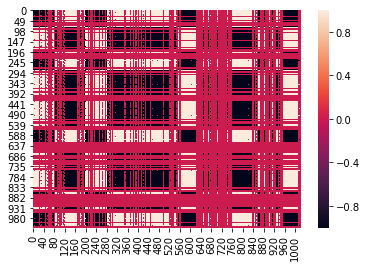

In [9]:
sns.heatmap(smatrix)

In [44]:
np.savetxt("smatrix.txt", smatrix, fmt="%d")

In [2]:
phi = np.array([1,1,1])

NameError: name 'np' is not defined